## Regressão linear simples

## Introdução

O objetivo desse projeto é construir um modelo de regressão linear simples a partir de um conjunto de dados. A regressão linear simples é uma forma de modelar a relação entre duas variáveis. Avaliando os aspectos de um relacionamento, conseguimos descobrir padrões e transformar grandes quantidades de dados em conhecimento valioso. Isso nos permite fazer previsões e decisões melhores.

Nesse exemplo, vamos explorar a relação entre o orçamento de propaganda de rádio e as vendas de uma empresa X.

O conjunto de dados fornecido inclui informações sobre campanhas de marketing na TV, rádio e mídias sociais, bem como quanta receita em vendas foi gerada por essas campanhas. Com base nessas informações, podemos tomar decisões sobre onde concentrar os futuros recursos de marketing.

O projeto é dividido em tres partes. Na primeiro parte fazemos análise exploratória de dados, descobrindo o tamanho e o conteudo de dados. Verificas se há valores ausentes nos dados. Na segunda parte construimos o modelo de regressão linear simples usando o método de Mínimos Quadrados Ordinários (MQO) e calculamos o "best fit". Por fim, analisamos os resultados. Ao longo do projeto, verificamos as hipóteses do modelo linear simples. São 4 hipóteses (H1-H4) fundamentais sobre os quais de sustenta o seu uso como o melhor estimador linear não viesado:
- H1: linearidade (o modelo é linear nos parametros).
- H2: normalidade (a amostragem é aleatória).
- H3: variação amostral da variável independente.
- H4: homoscedasticidade (a distribuição condicional dos erros apresenta média zero).

## Primeiro passo: Análise Exploratória de Dados

In [1]:
# Importamos bibliotecas e pacotes necessários 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

O conjunto de dados fornecido é um arquivo csv (`marketing_sales_data.csv`) contendo informações sobre marketing promocional realizado em colaboração com influenciadores, juntamente com as vendas correspondentes. As variáveis numéricas nos dados sejam expressas em milhões de dólares.

In [2]:
# Carregamos o conjunto de dados em um DataFrame e salvamos em uma variável "data"

data = pd.read_csv("marketing_sales_data.csv")

In [3]:
# Exibimos as primeiras 10 linhas dos dados

data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774791
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


Observação: os megainfluenciadores têm mais de 1 milhão de seguidores, os macroinfluenciadores têm de 100.000 a 1 milhão de seguidores, os microinfluenciadores têm de 10.000 a 100.000 seguidores e os nanoinfluenciadores têm menos de 10.000 seguidores.

In [4]:
data.shape

(572, 5)

Podemos ver que existem 572 linhas e 5 colunas. Podemos interpretar isso como 572 empresas juntamente com 5 aspectos sobre cada empresa que revelam como promovem os seus produtos/serviços e as vendas acumuladas com a sua promoção.

Vamos verificar se há valores ausentes nos dados. É importante porque os valores ausentes não são significativos para modelar o relacionamento entre duas variáveis. 

In [5]:
data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [6]:
data.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

In [7]:
data.isna().any(axis=1).sum()

3

Podemos ver que existem 3 linhas sem valores, o que não é muito, considerando o número total de linhas. Seria apropriado apagar essas linhas. É uma etapa importante na limpeza de dados, pois torna os dados mais utilizáveis para a análise de regressão.

In [8]:
# .dropna(axis=0) indica que queremos que as linhas sem valores sejam eliminadas

data = data.dropna(axis=0)

In [9]:
# verificamos se os dados não contêm nenhuma linha sem dados agora

data.isna().any(axis=1).sum()

0

Começamos construindo um gráfico de relacionamentos entre os dados. Isso ajuda a visualizar as relações entre as variáveis nos dados e a verificar as hipóteses do modelo.

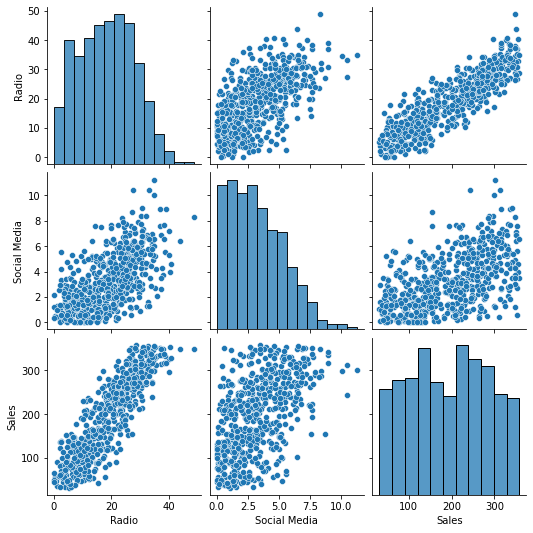

In [10]:
sns.pairplot(data)

####  H1: Linearidade 

No gráfico de dispersão de `Vendas` sobre `Rádio`, os pontos se agrupam em torno de uma reta, podemos assumir que a suposição de linearidade foi atendida.

## Segundo passo: construção de modelo 

In [13]:
#Escolhemos colunas relevantes

mqo_data = data[["Radio", "Sales"]]

In [14]:
mqo_data.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774791
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


In [15]:
# Escrevemos a fórmula de regressão linear

mqo_formula = "Sales ~ Radio"

### Implementamos a abordagem dos Mínimos Quadrados Ordinários (MQO) para regressão linear.

In [16]:
OLS = ols(formula = mqo_formula, data = mqo_data)

### Criamos um modelo de regressão linear para os dados e ajuste.

In [17]:
model = OLS.fit()

## Terceiro passo: resultados

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          2.07e-176
Time:                        16:27:26   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos ver que a intersessão é igual a 41.5326 e o valor de coeficiente angular (inclinação) é 8.1733.

### O que que significa a inclinação neste contexto?

- Uma interpretação: se uma empresa tivesse um orçamento de 1 milhão de dólares a mais para promover os seus produtos/serviços na rádio, as vendas da empresa aumentariam em média 8,1733 milhões de dólares.
- Outra interpretação: empresas com 1 milhão de dólares a mais em seu orçamento de promoção de rádio acumulam, em média, 8,1733 milhões de dólares a mais em vendas.



### Construimos os dados de MQO com a reta de regressão de melhor ajuste.

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

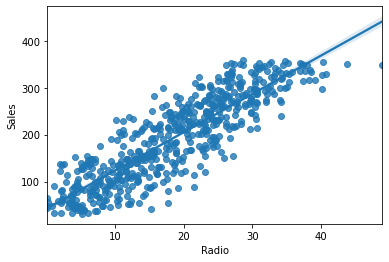

In [20]:
sns.regplot(x = "Radio", y = "Sales", data = mqo_data)

O gráfico de regressão mostra uma relação aproximadamente linear entre as duas variáveis juntamente com a linha de melhor ajuste. Isso confirma a hipótese de linearidade.

### Resíduos do modelo

Vamos calcular e visualizar os resíduos do modelo.

In [21]:
residuals = model.resid

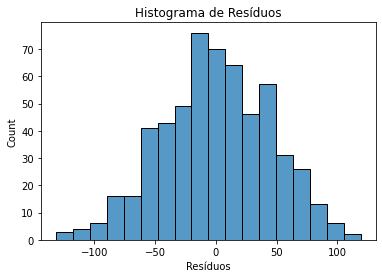

In [22]:
fig = sns.histplot(residuals)
fig.set_xlabel("Resíduos")
fig.set_title("Histograma de Resíduos")
plt.show()

####  H2: Normalidade
Podemos ver que a distribuição dos resíduos é aproximadamente normal. Isso indica que a hipótese de normalidade provavelmente será atendida.

### Construimos gráfico Q-Q de resíduos.

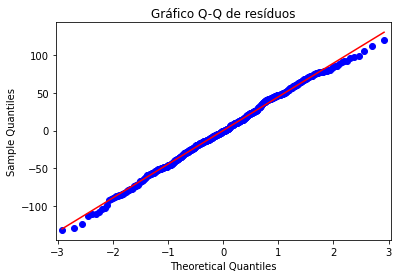

In [23]:
sm.qqplot(residuals, line='s')
plt.title("Gráfico Q-Q de resíduos")
plt.show()

Observamos que os pontos se alinham de maneira próxima a uma reta diagonal com uma clara tendência ascendente. Isso valida a hipótese de que a distribuição dos dados segue uma distribuição normal.

### Verificamos as hipóteses de independencia de dados observados e homoscedasticidade (H3 e H4).


In [24]:
fitted_values = model.predict(mqo_data["Radio"])

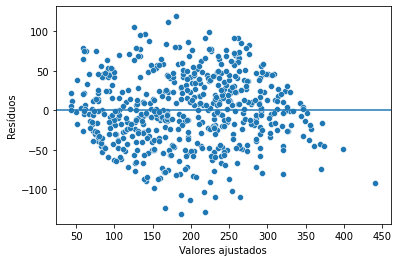

In [25]:
# Construimos um gráfico de dispersão de resíduos em relação aos valores ajustados

fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Valores ajustados")
fig.set_ylabel("Resíduos")
plt.show()

Podemos ver que os pontos de dados têm uma semelhança com a nuvem e não seguem um padrão explícito. Assim, parece que a suposição da observação independente não foi violada. Além disso, considerando que os resíduos aparentam estar distribuídos aleatoriamente, podemos afirmar que a hipótese de homocedasticidade também parece ser satisfeita.

## Conclusão

- Visualizações de dados e análise exploratória de dados podem ser usadas para verificar se a regressão linear é uma abordagem adequada para modelar a relação entre duas variáveis.
- Os resultados de um modelo de regressão linear podem ser utilizados para expressar a relação entre duas variáveis.

Podemos destacar duas interpretações:
- Uma interpretação: se uma empresa tivesse um orçamento de 1 milhão de dólares a mais para promover os seus produtos/serviços na rádio, as vendas da empresa aumentariam em média 8,1733 milhões de dólares.
- Outra interpretação: empresas com 1 milhão de dólares a mais em seu orçamento de promoção de rádio acumulam, em média, 8,1733 milhões de dólares a mais em vendas.




**Bibliografia**

Pandas.DataFrame.Any — Pandas 1.4.3 Documentation. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html.

Pandas.DataFrame.Isna — Pandas 1.4.3 Documentation. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html.

Pandas.Series.Sum — Pandas 1.4.3 Documentation. https://pandas.pydata.org/docs/reference/api/pandas.Series.sum.html.

Saragih, H.S. *Dummy Marketing and Sales Data*. https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data.